In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos
import urllib
from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
phish_data = pd.read_csv(r"C:\Users\Abdul Raheem A\Downloads\S7 - Project\phishing_site_urls.csv")

In [3]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [6]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
label_counts=pd.DataFrame(phish_data.Label.value_counts().rename_axis('').to_frame('Label'))

In [8]:
print(label_counts.Label)


good    392924
bad     156422
Name: Label, dtype: int64


<AxesSubplot: ylabel='Label'>

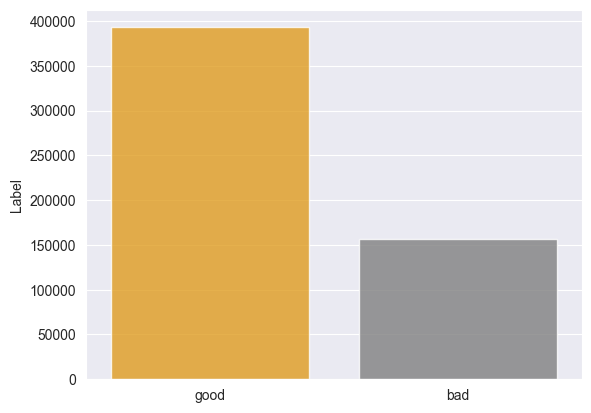

In [9]:
sns.set_style('darkgrid')
cols = ['grey' if (x < max(label_counts.Label)) else 'orange' for x in label_counts.Label]
sns.barplot(x=label_counts.index,y=label_counts.Label,alpha=0.8,palette=cols)

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
phish_data.URL[1]

'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php'

In [12]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 1.7756616999977268 sec


In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized
468828,yellowpages.com/charlotte-nc/edward-jones-fina...,good,"[yellowpages, com, charlotte, nc, edward, jone..."
476184,youtube.com/watch?v=fMLGsNtN6dY,good,"[youtube, com, watch, v, fMLGsNtN, dY]"
205235,kevinhermening.com/,good,"[kevinhermening, com]"
229376,pipl.com/directory/people/Dennis/Durocher,good,"[pipl, com, directory, people, Dennis, Durocher]"
10485,paypal.cgi-bin.update.herf.secure.cente.5885d8...,bad,"[paypal, cgi, bin, update, herf, secure, cente..."


In [15]:
stemmer = SnowballStemmer("english")

In [16]:

print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 34.00110659998609 sec


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
397945,mylife.com/zip-codes/b3-363569/,good,"[mylife, com, zip, codes, b]","[mylif, com, zip, code, b]"
376018,linkedin.com/pub/brad-komminsk/9/11a/916,good,"[linkedin, com, pub, brad, komminsk, a]","[linkedin, com, pub, brad, komminsk, a]"
205004,kcsoccercom.blogspot.com/2009/02/kcsoccercom-i...,good,"[kcsoccercom, blogspot, com, kcsoccercom, inte...","[kcsoccercom, blogspot, com, kcsoccercom, inte..."
432559,smh.com.au/afl/afl-news/age-footballer-of-the-...,good,"[smh, com, au, afl, afl, news, age, footballer...","[smh, com, au, afl, afl, news, age, footbal, o..."
105414,ablewebdesign.com/wp-content/file/files/db/fil...,bad,"[ablewebdesign, com, wp, content, file, files,...","[ablewebdesign, com, wp, content, file, file, ..."


In [18]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.15755230002105236 sec


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
251576,twitter.com/davidpkelly,good,"[twitter, com, davidpkelly]","[twitter, com, davidpkelli]",twitter com davidpkelli
42704,www.keithspetandfarmsupply.com/components/com_...,bad,"[www, keithspetandfarmsupply, com, components,...","[www, keithspetandfarmsuppli, com, compon, com...",www keithspetandfarmsuppli com compon com sear...
509358,chalengeforyou.win/rss/feed/stream,bad,"[chalengeforyou, win, rss, feed, stream]","[chalengeforyou, win, rss, feed, stream]",chalengeforyou win rss feed stream
101102,momentum.co.cr/pdf/adobe/viewer.php,bad,"[momentum, co, cr, pdf, adobe, viewer, php]","[momentum, co, cr, pdf, adob, viewer, php]",momentum co cr pdf adob viewer php
304251,chronicle.pitt.edu/?p=5212,good,"[chronicle, pitt, edu, p]","[chronicl, pitt, edu, p]",chronicl pitt edu p


In [20]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [21]:
bad_sites.head(2)

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...


In [22]:
good_sites.head(2)

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...


In [23]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [24]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [25]:
urllib.request.urlretrieve('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw0ODQ0OCwoIDhEOCgoOEA8ICA8IDQ0KFREWFhURFRMYKCggGBolGxMVITEhJSkrLi4uGB8zOD8sNygtLisBCgoKDQ0OFw8QDzcZFRotKys3KysrKystNystKystKys3Kys3KystKys3LSsrKysrKystKystKysrKysrKysrK//AABEIANsA5gMBIgACEQEDEQH/xAAZAAEBAQEBAQAAAAAAAAAAAAAAAwQCAQf/xAAlEAEBAAECBgIDAQEAAAAAAAAAAQMCERMhMWFxoWKRBEFRgUL/xAAWAQEBAQAAAAAAAAAAAAAAAAAAAQL/xAAXEQEBAQEAAAAAAAAAAAAAAAAAEQEh/9oADAMBAAIRAxEAPwD7iAAAAAAAAAAAADnXdpaDnRr31WKMmO7WNa6mACKAAAAAAAAAAAAAAAAAAAAAAAAJfkXlIqzZrvqv0uJqbXju8jIv+Pes/wBXUxYBloAAAAAAAAAAAAAAAAAAAAAAAB5qu0t7Mi+e8tv6zriaO8d2scCo2jnRd5K6ZaAAAAAAAAAAAAAAAAAAAAAAAeW7QGfNd9XhN7a8aZAAX/HvKxZlxXbVPpqTVwARQAAAAAAAAAAAAAAAAAAABPPeXlRnz3n4XE1IBUAA\
  etem7yVjaPx7y2/hq4qAyoAAAAAAAAACevJZ/wA/7u44/b2vYhkw/vT9Khx/j7OP8faTxYlW4/x9nH+PtEIVbj9vZx+3tEIVfj9vZx+3tAIVfj/H2jbu8AAAAAHePXtd3AC/H+Ps4/b2gEKvx+3t5x+3tEIVbj9vZx/j7RCFW4/b2cft7RCFW4/afZx+0+0pN+jRjxbdedOL17o1W9ZIOxlQAE8mOXyhq02dWt5q0y9VqRjFMmKzvE1QAAAAAAAAAAAAAAAAB6Dx3ox2+FMeH96vpZKsc6dMnR0CKAAAAAAJZMP7n0qAx2PGvXol6s+vRZ1arMcAAAAAAAAAAAAArjxW9eUBxp029GjRjk8upJOj1KsAEUAAAAAAAAAAeWf16Ahkxbc4i1ZtW088mVrGdAAAAAAAAHsjx7KC+PFtzqryXd6y0AAAAAAAAAAAAAAAAh+Ree38RdarvbXLTIAAAAAAAAADTgvLwoz4Lz8tCauACKAAAAAAAAAAAAOMt2036dofkXnIuGogKyAAD1bHh/er6BHZ42WS8tkMmKzpzhSJAAAA9la5WNpwXl4TVxQBFAAAAAAAAAAAAGTXd7a0ZbtL9Mq4mgCoOtOm3o6x4rfDRp0ydCkc48cnl2DLQACWTFvziFm3Vsc69EvVakZB3r0WdXCoK4NXPyk9l2BsHkr1loAAAAAAAAAAABD8i85EXWu7200aLejTLyRbHh/er6d6NEjtKsAEUAAAAAB5Z/UMmLbnGgBiGnJil6cqz2WdWmWjBeXhRnwXnt/WhNXABFAAAAAAAAHGW7Su3Nm9m4I48W/XlF5Nuj0AAAAAAAAAAAAAc6tMvV0AzatF03fu0yjzTOSo9ARQAAAH/9k=',"star.png")

('star.png', <email.message.Message at 0x27eb3e3e810>)

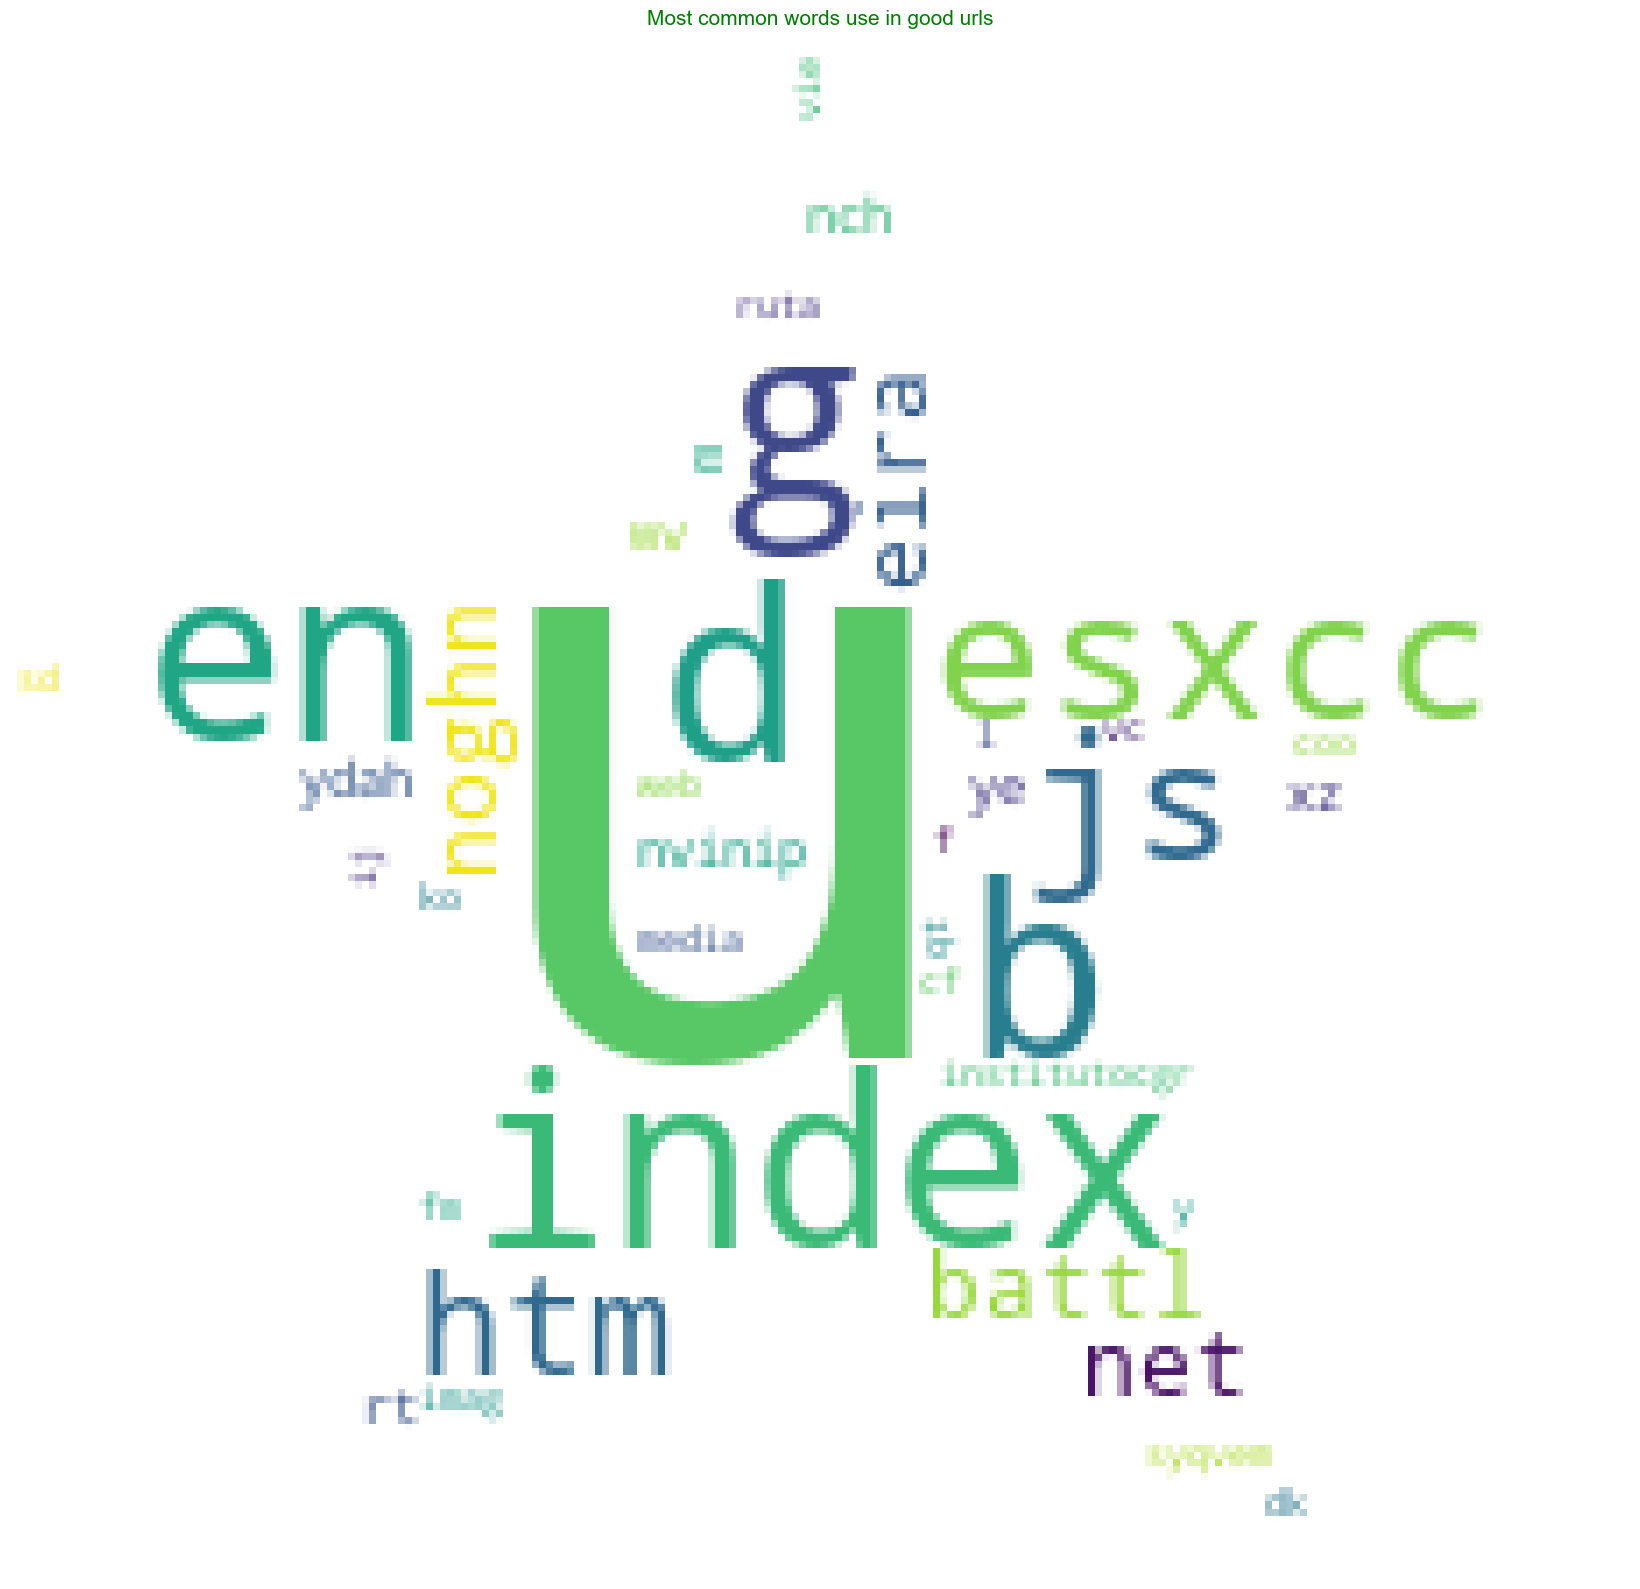

In [26]:
common_text = str(data)
common_mask = np.array(Image.open("star.png"))
plot_wordcloud(common_text, common_mask, max_words=40, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [27]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

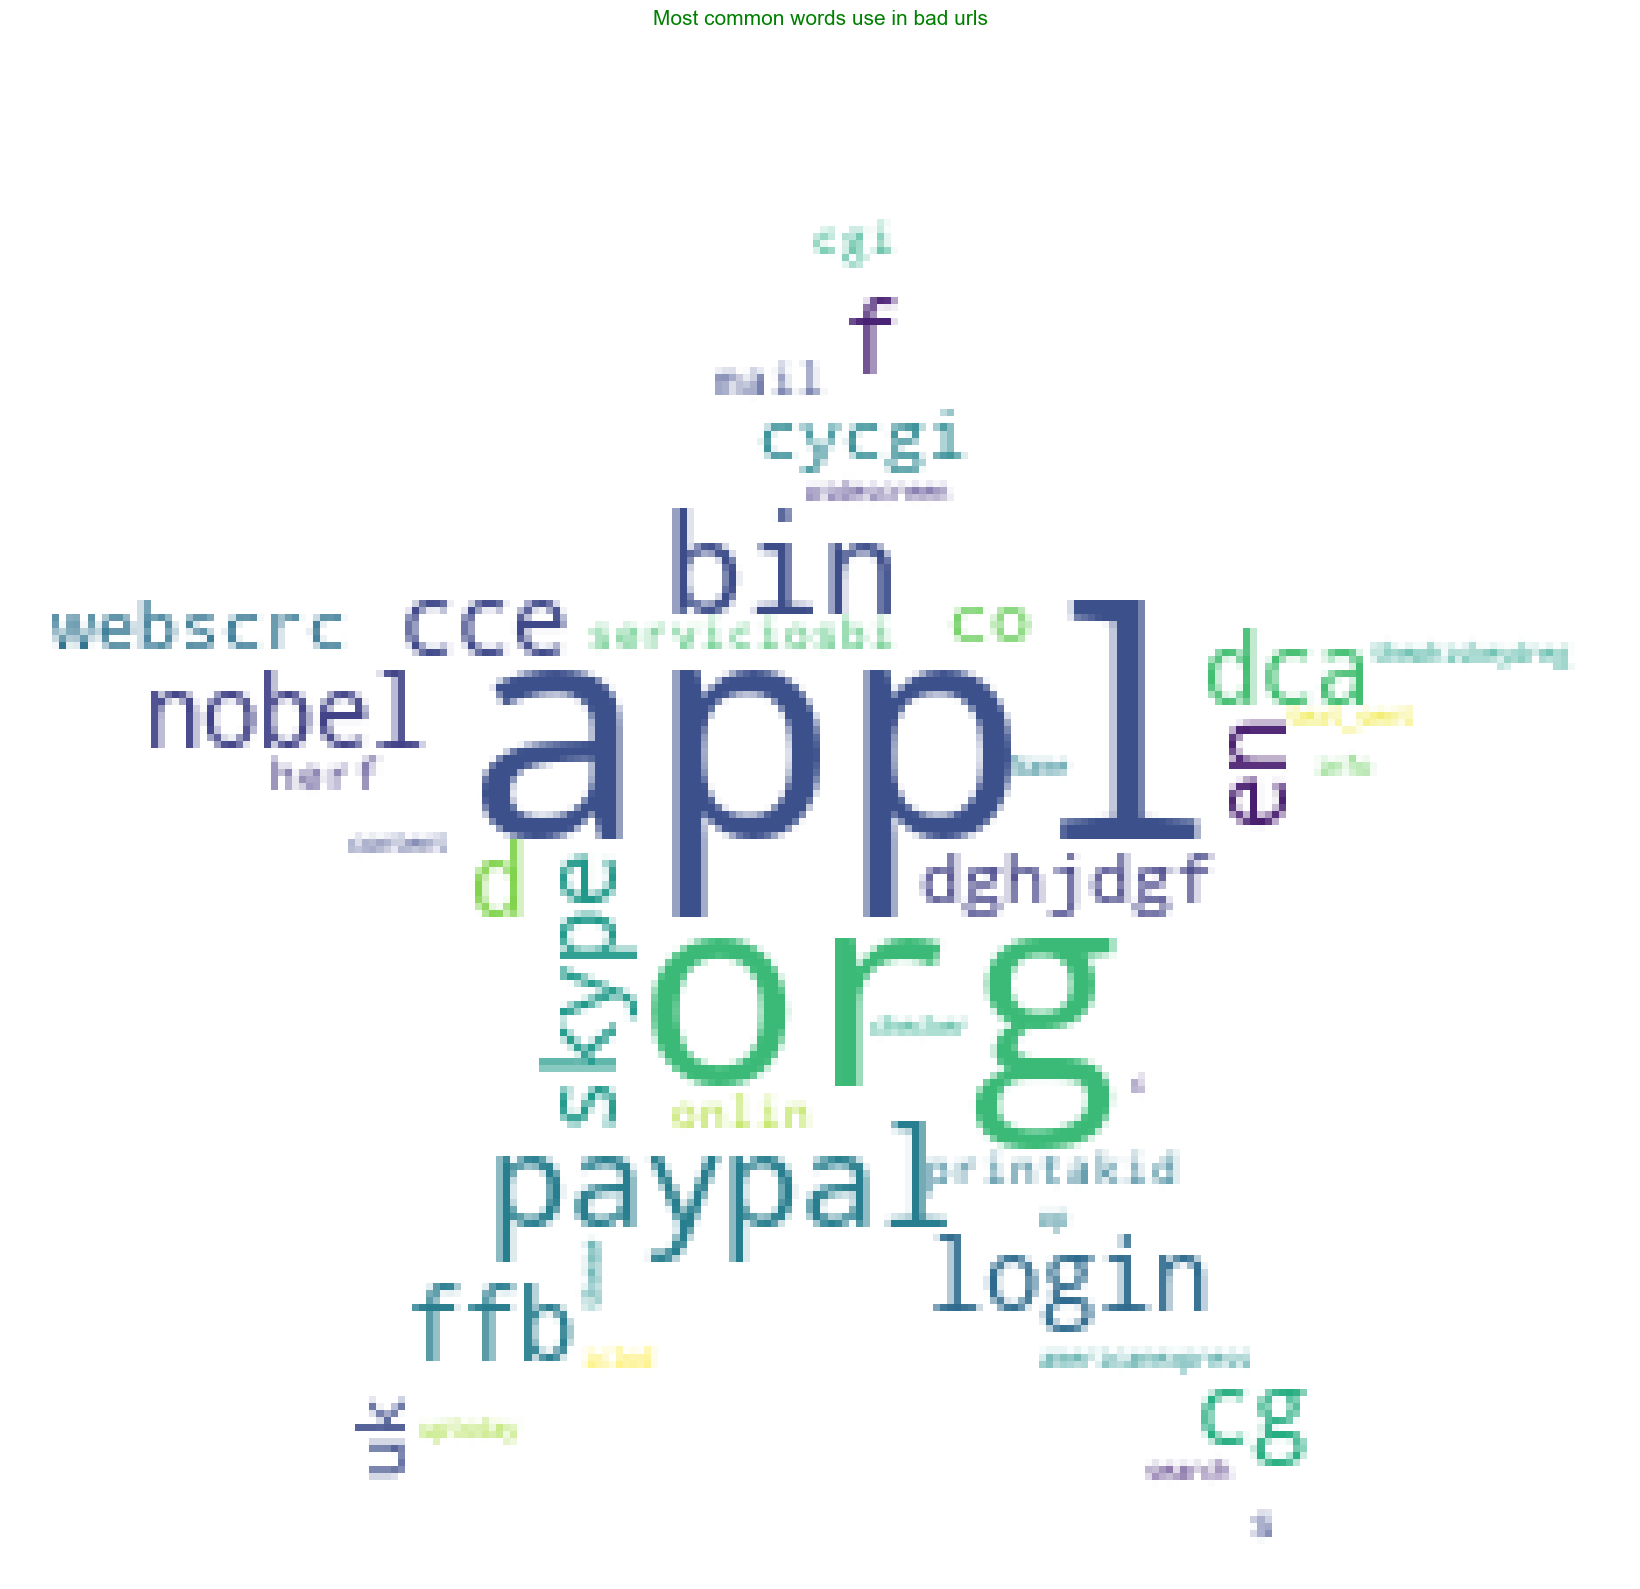

In [28]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=40, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

In [29]:
browser = webdriver.Chrome()

In [30]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

In [31]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [32]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [33]:
df.head()

,from,to
0,https://www.ezeephones.com/,https://sedo.com/search/details/?partnerid=144...
1,https://www.ezeephones.com/,https://sedo.com/search/details/?partnerid=144...
2,https://www.ezeephones.com/,https://www.sedo.com/services/parking.php3
3,https://www.ezeephones.com/,#
4,https://www.ezeephones.com/about-us,https://sedo.com/search/details/?partnerid=144...


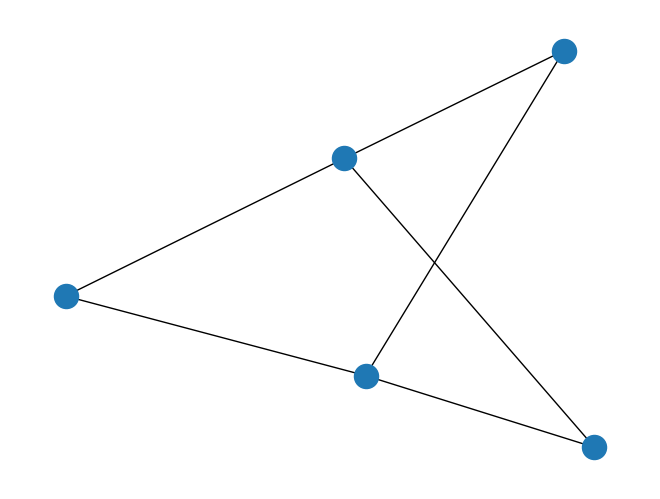

In [34]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

In [35]:
cv = CountVectorizer()

In [36]:
feature = cv.fit_transform(phish_data.text_sent)

In [37]:
feature[:5].toarray() 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(trainX,trainY)

LogisticRegression()

In [41]:
lr.score(testX,testY)

0.9641174628832725

In [42]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9793451113931977
Testing Accuracy : 0.9641174628832725

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36698
        Good       0.99      0.96      0.98    100639

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot: >

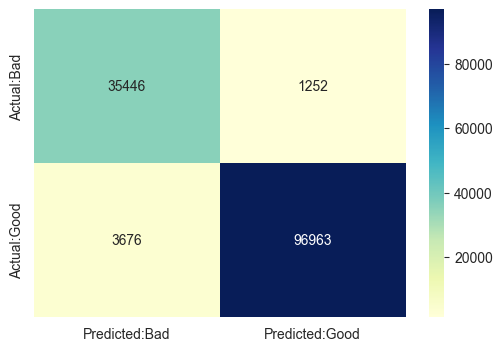

In [43]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [44]:
# create mnb object
mnb = MultinomialNB()

In [45]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [46]:
mnb.score(testX,testY)

0.9582195620990702

In [47]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9738937741651275
Testing Accuracy : 0.9582195620990702

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     38164
        Good       0.98      0.97      0.97     99173

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot: >

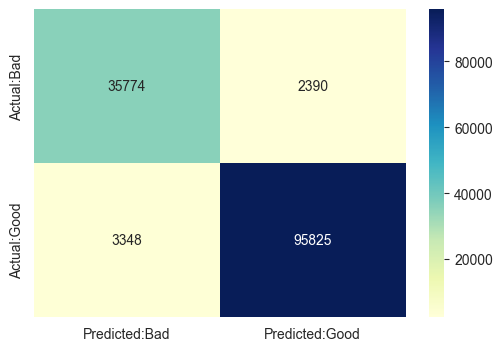

In [48]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [49]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [50]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [51]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [52]:
pipeline_ls.score(testX,testY) 

0.9664474977609822

Training Accuracy : 0.9803159639716608
Testing Accuracy : 0.9664474977609822

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36898
        Good       0.99      0.97      0.98    100439

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot: >

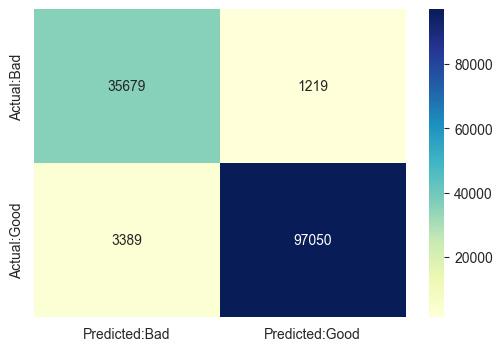

In [53]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [54]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [55]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9664474977609822


In [56]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['http://localhost:8888/notebooks/seven.ipynb','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['bad' 'good' 'good' 'good']
